In [1]:
from common import sns_cm, get_set, display_accuracy, scatter_plot
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

##### Change directories and load Lab 1

# Classification of different positions

#### We will use the K-nearest neighbor algorithm and decision trees in this lab. In this part you should only work with the movement positions:
- Squats
- Jumping
- Running
- Walking

In [2]:
movement_positions : list[str] = ['Squats', 'Jumping', 'Running', 'Walking']

In [3]:
training_sets = get_set(positions=movement_positions, folder='Class Dataframes')
testing_sets = get_set(positions=movement_positions, folder='Test')

In [4]:
testing_set = pd.concat(testing_sets, axis='rows')
df = pd.concat(training_sets, axis='rows')

#### We start with working with the KNN algorithm. You should use crossvalidation for evaluating the model.

In [5]:
knn = KNeighborsClassifier()

In [6]:
df

,ax,ay,az,gx,gy,gz,class
0,-2.837289,-16.732111,-5.967700,1.946007,1.308435,0.363760,Jumping
1,-2.212464,-14.917455,-4.124329,1.974106,1.288888,0.380863,Jumping
2,-1.274178,-13.732409,-2.247459,1.916686,1.043327,0.395524,Jumping
3,-0.354736,-12.463615,-0.779761,1.811620,0.621843,0.391859,Jumping
4,0.516850,-11.177772,0.309571,1.704111,0.091474,0.361316,Jumping
...,...,...,...,...,...,...,...
4596,1.924428,-9.722338,0.285643,0.574349,0.309394,0.107509,Walking
4597,1.883750,-9.856336,0.304786,0.590231,0.364370,0.094070,Walking
4598,1.603789,-9.856336,-0.059222,0.619552,0.445002,0.069637,Walking
4599,0.997807,-9.717552,-0.679263,0.646429,0.523191,0.047646,Walking


In [7]:
X = df.drop('class', axis='columns')
y = df['class']

##### Make a choice of the number of subsets that you use for your crossvalidation. Motivate the choice

In [8]:
folds = KFold(n_splits=20)

#### For the gridsearch use GridSearchCV which you find in the previous weeks ́ exercise. The hyperparameter you will use for the gridsearch is k, that is the number of neighbours.

##### Make a choice of the range of k-values you will use. Motivate the choice.
Too large K values will 'classify' each instance of 'df'.

In [9]:
k_range = list(range(1, 50))

##### Split data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

##### Train the model.

In [11]:
grid = GridSearchCV(estimator=knn,
                    param_grid=dict(n_neighbors=k_range),
                    cv=folds,
                    scoring='accuracy',
                    return_train_score=False)

In [12]:
grid_search = grid.fit(X=X_train, y=y_train)

##### What is the optimal k-value?

In [13]:
grid.best_params_

{'n_neighbors': 3}

##### What is the accuracy?

In [14]:
grid.best_score_

0.907216022271822

In [15]:
scores = pd.DataFrame(grid.cv_results_)

##### Display scores

In [16]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014440,0.002422,0.014890,0.007194,1,{'n_neighbors': 1},0.904025,0.913178,0.899225,0.899225,...,0.906977,0.913178,0.903876,0.919380,0.885271,0.900775,0.913178,0.903883,0.010764,3
1,0.013923,0.000697,0.014534,0.000974,2,{'n_neighbors': 2},0.891641,0.891473,0.899225,0.896124,...,0.893023,0.899225,0.894574,0.917829,0.882171,0.900775,0.896124,0.893497,0.010651,15
2,0.013151,0.000633,0.013711,0.000630,3,{'n_neighbors': 3},0.913313,0.916279,0.927132,0.897674,...,0.894574,0.920930,0.903876,0.920930,0.886822,0.903876,0.917829,0.907216,0.013143,1
3,0.013486,0.000563,0.014885,0.001584,4,{'n_neighbors': 4},0.908669,0.905426,0.913178,0.885271,...,0.902326,0.908527,0.888372,0.920930,0.880620,0.894574,0.913178,0.902178,0.012646,5
4,0.013373,0.000564,0.014330,0.001049,5,{'n_neighbors': 5},0.910217,0.919380,0.924031,0.893023,...,0.888372,0.916279,0.900775,0.922481,0.886822,0.897674,0.905426,0.903960,0.012886,2
5,0.013362,0.000451,0.015109,0.001196,6,{'n_neighbors': 6},0.904025,0.916279,0.919380,0.889922,...,0.893023,0.911628,0.889922,0.924031,0.886822,0.888372,0.919380,0.901403,0.013715,6
6,0.013393,0.000528,0.014974,0.000640,7,{'n_neighbors': 7},0.910217,0.917829,0.914729,0.903876,...,0.899225,0.910078,0.888372,0.917829,0.888372,0.889922,0.906977,0.902798,0.011399,4
7,0.013114,0.000519,0.014827,0.000781,8,{'n_neighbors': 8},0.908669,0.910078,0.910078,0.900775,...,0.899225,0.908527,0.885271,0.914729,0.883721,0.893023,0.906977,0.900240,0.011059,8
8,0.013314,0.001236,0.014750,0.000674,9,{'n_neighbors': 9},0.910217,0.902326,0.913178,0.905426,...,0.886822,0.902326,0.896124,0.911628,0.889922,0.897674,0.911628,0.900627,0.009563,7
9,0.013046,0.000620,0.015244,0.000880,10,{'n_neighbors': 10},0.905573,0.899225,0.913178,0.900775,...,0.897674,0.905426,0.894574,0.914729,0.880620,0.897674,0.903876,0.898457,0.011179,9


##### Plot the accuracy as a function of the k-value. You need to extract that information from the model. How sensitive is the performance of the model for different k-values?

In [17]:
mean_test_score = scores['mean_test_score']

In [18]:
mean_test_score

0     0.903883
1     0.893497
2     0.907216
3     0.902178
4     0.903960
5     0.901403
6     0.902798
7     0.900240
8     0.900627
9     0.898457
10    0.897062
11    0.895511
12    0.894969
13    0.894117
14    0.894582
15    0.890862
16    0.890862
17    0.888846
18    0.887761
19    0.887218
20    0.886598
21    0.885590
22    0.885435
23    0.884738
24    0.884195
25    0.884040
26    0.882567
27    0.882102
28    0.880552
29    0.880707
30    0.879079
31    0.878149
32    0.877529
33    0.878072
34    0.876754
35    0.875359
36    0.874506
37    0.874739
38    0.874738
39    0.873110
40    0.873188
41    0.872490
42    0.871018
43    0.870475
44    0.869389
45    0.868072
46    0.866754
47    0.866444
48    0.864816
Name: mean_test_score, dtype: float64

<Axes: title={'center': 'Accuracy'}, xlabel='k'>

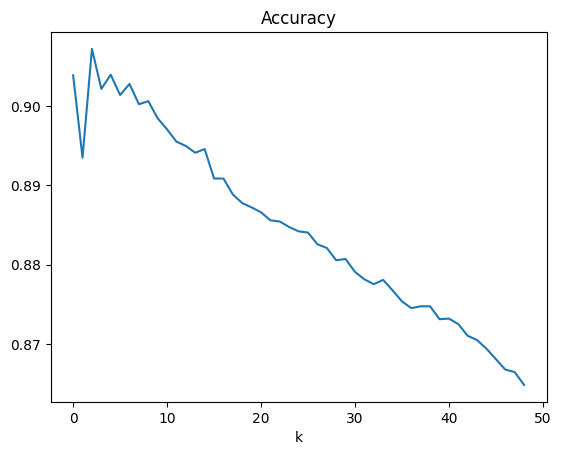

In [19]:
mean_test_score.plot(title = 'Accuracy', xlabel='k')

#### Now it is time to look at the test set with the optimal k-value

##### Use the model on the test set and acquire both the accuracy and the plot the confusion matrix

In [20]:
y_pred = grid.predict(X=X_test)

In [21]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9046843913908482

In [22]:
X_test_sample = testing_set.drop('class', axis='columns')
y_true_sample = testing_set['class']
y_test_pred = grid.predict(X=X_test_sample)

In [23]:
display_accuracy(accuracy_score(y_true=y_test, y_pred=y_pred), accuracy_score(y_true=y_true_sample, y_pred=y_test_pred))

Validation set accuracy: 0.9046843913908482
Test set accuracy: 0.8616761594792515


##### Explain the result in the confusion matrix

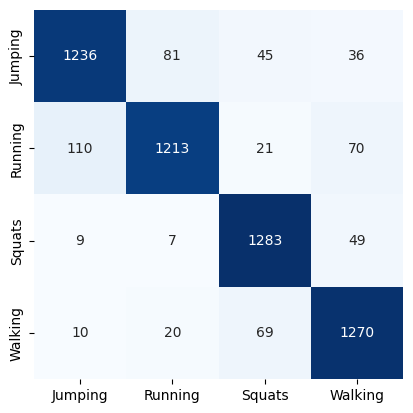

In [24]:
sns_cm(y_test, y_pred)

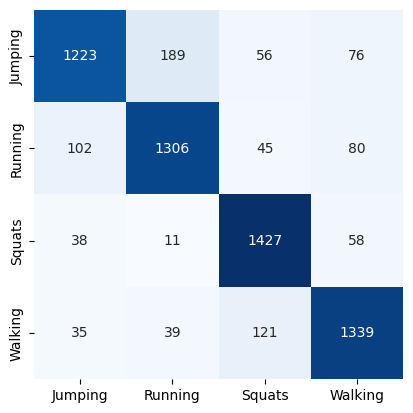

In [25]:
sns_cm(y_true_sample, y_test_pred)

##### Scatter plot of training sets


<Axes: xlabel='ax', ylabel='ay'>

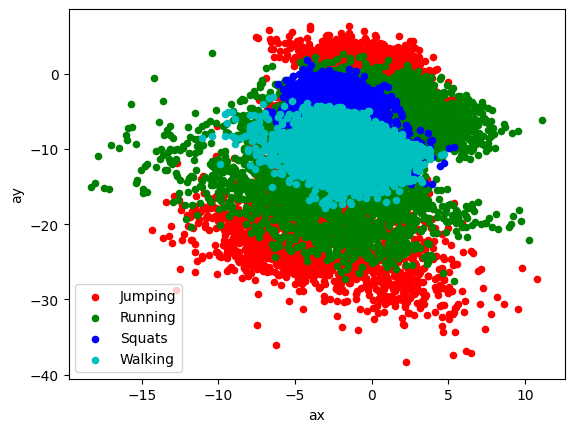

In [26]:
scatter_plot(training_sets)

##### Scatter plot of testing sets


<Axes: xlabel='ax', ylabel='ay'>

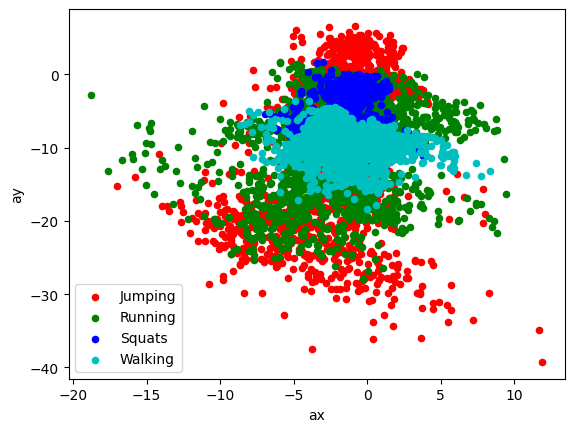

In [27]:
scatter_plot(testing_sets)